In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/summer21/new/src/data/boston

/content/drive/My Drive/summer21/new/src/data/boston


In [3]:
import pandas as pd
import numpy as np
import glob as gl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import IPython.display as ipy
import plotly

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data.insert(loc=0, column='MEDV', value=boston_dataset.target)
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


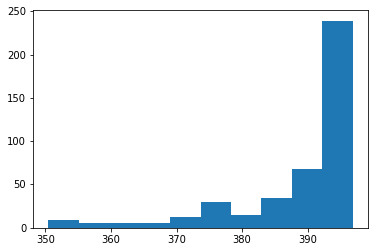

In [6]:
import matplotlib.pyplot as plt

plt.hist(data[data['B'] > 350]['B'].values)
plt.show()

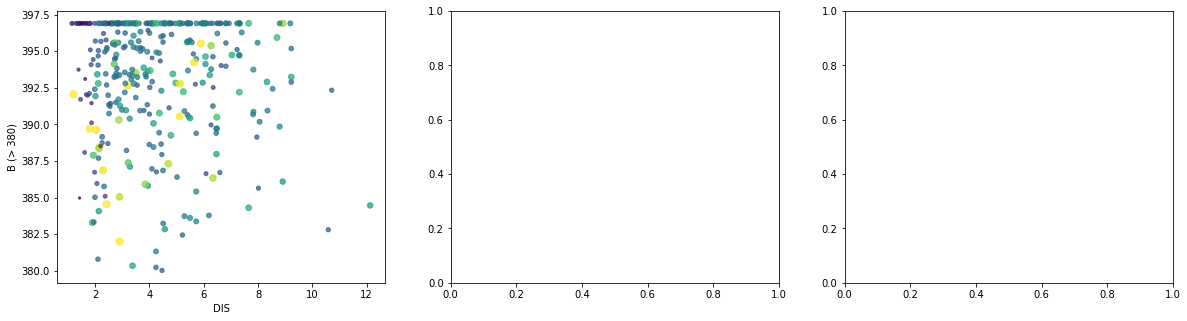

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(data[data['B'] > 380]['DIS'].values, data[data['B'] > 380]['B'].values, c=data[data['B'] > 380]['MEDV'].values, s=data[data['B'] > 380]['MEDV'].values, alpha=0.75)
ax1.set_xlabel('DIS'), ax1.set_ylabel('B (> 380)')

# ax2.scatter(data['RAD'].values, data['INDUS'].values, c=validate[:,0], s=validate[:,0] * 100, alpha=0.75)
# ax2.set_xlabel('RAD'), ax2.set_ylabel('INDUS')

# ax3.scatter(data['B'].values, data['ZN'].values, c=y_pred, s=y_pred * 5, alpha=0.75)
# ax3.set_xlabel('B'), ax3.set_ylabel('ZN')

plt.show()

In [8]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data = scaled 
data

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.422222,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.368889,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.660000,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.631111,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.693333,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.386667,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.346667,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.420000,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.377778,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [9]:
with open('boston_raw.csv', 'w+') as f:
    f.write(data.to_csv())

In [10]:
train_test, validate = train_test_split(data, test_size=0.33)

In [ ]:
train, test = train_test_split(train_test, test_size=0.5)

In [ ]:
train

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
10,0.222222,0.002457,0.125,0.271628,0.0,0.286008,0.539567,0.941298,0.474416,0.173913,0.236641,0.276596,0.988956,0.516556
452,0.246667,0.057141,0.000,0.646628,0.0,0.674897,0.524238,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
490,0.068889,0.002261,0.000,1.000000,0.0,0.460905,0.293543,0.979403,0.063018,0.130435,1.000000,0.797872,0.802133,0.771247
405,0.000000,0.763342,0.000,0.646628,0.0,0.633745,0.406591,1.000000,0.026898,1.000000,0.914122,0.808511,0.969918,0.586369
383,0.162222,0.089763,0.000,0.646628,0.0,0.648148,0.375359,1.000000,0.036692,1.000000,0.914122,0.808511,1.000000,0.629967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.308889,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117
434,0.148889,0.156312,0.000,0.646628,0.0,0.674897,0.507185,0.948507,0.099355,1.000000,0.914122,0.808511,0.252938,0.370861
24,0.235556,0.008362,0.000,0.281525,0.0,0.314815,0.452769,0.939238,0.297357,0.130435,0.229008,0.893617,0.993520,0.402042
65,0.411111,0.000332,0.800,0.106672,0.0,0.026749,0.522897,0.153450,0.498495,0.130435,0.286260,0.372340,1.000000,0.081126


In [ ]:
test

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.451111,0.001519,0.00,0.236437,0.0,0.129630,0.499713,0.038105,0.417509,0.086957,0.087786,0.563830,0.965883,0.112583
139,0.284444,0.006049,0.00,0.785557,0.0,0.491770,0.496264,0.978373,0.049023,0.130435,0.477099,0.914894,1.000000,0.461645
372,1.000000,0.092851,0.00,0.646628,1.0,0.582305,0.443380,0.892894,0.000000,1.000000,0.914122,0.808511,0.876393,0.197296
365,0.500000,0.051136,0.00,0.646628,0.0,0.685185,0.000000,0.875386,0.043976,1.000000,0.914122,0.808511,0.893590,0.148731
256,0.866667,0.000102,0.90,0.120601,0.0,0.018519,0.745928,0.322348,0.473452,0.086957,0.108779,0.351064,0.973372,0.038079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.355556,0.011196,0.00,0.281525,0.0,0.314815,0.596474,0.869207,0.282752,0.130435,0.229008,0.893617,0.957966,0.282837
298,0.388889,0.000656,0.70,0.065249,0.0,0.030864,0.533436,0.177137,0.609099,0.173913,0.326336,0.234043,0.927732,0.089404
491,0.191111,0.001117,0.00,1.000000,0.0,0.460905,0.464074,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
290,0.522222,0.000323,0.80,0.164589,0.0,0.053498,0.632305,0.257467,0.362566,0.130435,0.110687,0.702128,1.000000,0.044150


In [ ]:
validate

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
332,0.320000,0.000319,0.35,0.205279,0.0,0.108848,0.473271,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
469,0.335556,0.146890,0.00,0.646628,0.0,0.401235,0.412340,0.554068,0.154053,1.000000,0.914122,0.808511,1.000000,0.359547
352,0.302222,0.000743,0.60,0.045088,0.0,0.053498,0.445104,0.160659,0.871218,0.130435,0.427481,0.606383,0.988476,0.167219
57,0.591111,0.000090,1.00,0.031525,0.0,0.053498,0.623683,0.387230,0.654293,0.173913,0.131679,0.265957,0.989914,0.061258
50,0.326667,0.000926,0.21,0.189883,0.0,0.111111,0.460241,0.440783,0.516973,0.130435,0.106870,0.446809,0.996621,0.323400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.206667,0.009834,0.00,0.785557,0.0,0.491770,0.397777,0.945417,0.077322,0.130435,0.477099,0.914894,1.000000,0.458333
312,0.320000,0.002870,0.00,0.346041,0.0,0.327160,0.471738,0.901133,0.154989,0.130435,0.223282,0.617021,0.998487,0.275662
302,0.475556,0.000970,0.34,0.206378,0.0,0.098765,0.562177,0.159629,0.396666,0.260870,0.270992,0.372340,0.966488,0.191501
34,0.188889,0.018057,0.00,0.281525,0.0,0.314815,0.485725,0.968074,0.239176,0.130435,0.229008,0.893617,0.625321,0.513521


In [ ]:
with open('boston_train.csv', 'w+') as f:
    f.write(train.to_csv())

In [ ]:
with open('boston_test.csv', 'w+') as f:
    f.write(test.to_csv())

In [ ]:
with open('boston_validate.csv', 'w+') as f:
    f.write(validate.to_csv())

In [ ]:
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.neighbors import * 
from sklearn.svm import *

model = MLPRegressor(random_state=0)

0.6389386393277754